In [ ]:
import cv2
import numpy as np

fn = raw_input("Enter image file name and path: ")
fn_no_ext = fn.split('.')[0]
outputFile = fn_no_ext+'DoG.jpg'
#read the input file
img = cv2.imread(str(fn))

#run a 5x5 gaussian blur then a 3x3 gaussian blr
blur5 = cv2.GaussianBlur(img,(5,5),0)
blur3 = cv2.GaussianBlur(img,(3,3),0)

#write the results of the previous step to new files
cv2.imwrite(fn_no_ext+'3x3.jpg', blur3)
cv2.imwrite(fn_no_ext+'5x5.jpg', blur5)

DoGim = blur5 - blur3
cv2.imwrite(outputFile, DoGim)

In [22]:
import cv2

img = cv2.imread("depth_image.png")

blur7 = cv2.GaussianBlur(img,(0,0),2,2)
blur5 = cv2.GaussianBlur(img,(0,0),1,1)

DoGim = blur7 - blur5
# print(DoGim)
cv2.imwrite("DoG.png", DoGim)

True

In [21]:
ret,thresh = cv2.threshold(DoGim,254,255,cv2.THRESH_BINARY)
cv2.imwrite("DoG_thresh.png", thresh)

True

In [19]:
img = cv2.imread("depth_image_new.png")

blur = cv2.GaussianBlur(img,(0,0),0.1,0.1)

edge_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, 1)
edge = cv2.Sobel(edge_x, cv2.CV_64F, 0, 1, 1)

cv2.imwrite("edge.png", edge_x)

True

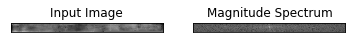

In [27]:
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("depth_image_new.png",0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
cv2.imwrite("dft.png", magnitude_spectrum)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

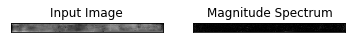

In [30]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
cv2.imwrite("idft.png", img_back)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()